In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('bitcoinfinal+(4).csv',header=None)
df.columns=['Month','Price']
df=df.set_index('Month')

In [9]:
df

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


In [10]:
train=df[:29]
test=df[29:]

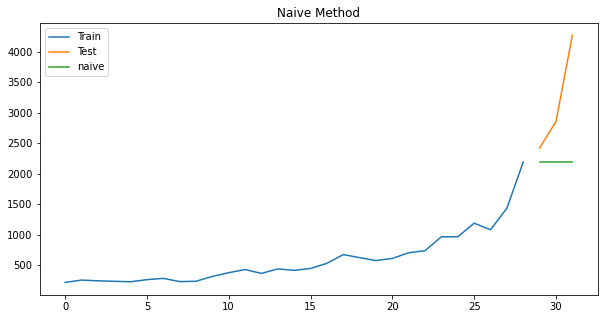

,Method,Mape,RMSE
0,Naive_method,27.12,1265.9


In [22]:
y_naive=test.copy()

y_naive['forecast']=train['Price'][28]
plt.figure(figsize=(10,5))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_naive['forecast'],label='naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_naive['forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_naive['forecast'])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['Naive_method'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

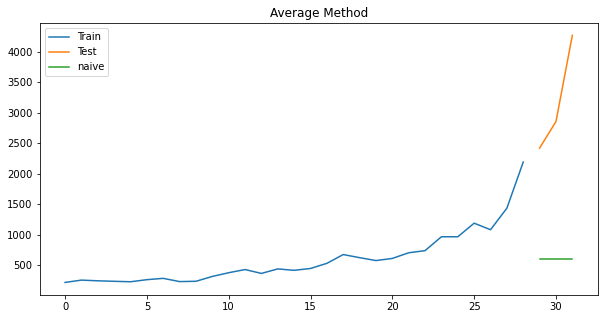

,Method,Mape,RMSE
0,SImple Average,80.19,2703.73


In [23]:
y_average=test.copy()

y_average['forecast']=train['Price'].mean()
plt.figure(figsize=(10,5))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_average['forecast'],label='naive')
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_average['forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_average['forecast'])/test['Price'])*100,2)
new_results=pd.DataFrame({'Method':['SImple Average'],'Mape':[mape],'RMSE':[rmse]})
new_results=new_results[['Method','Mape','RMSE']]
new_results

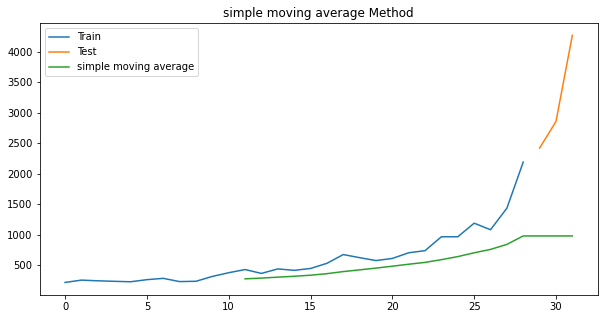

,Method,Mape,RMSE
0,moving average,67.42,2338.94


In [24]:
## Moving Average


y_sme=df.copy()
window=12
y_sme['forecast']=y_sme['Price'].rolling(window).mean()

y_sme['forecast'][29:]=y_sme['forecast'][28]
y_sme

plt.figure(figsize=(10,5))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_sme['forecast'],label='simple moving average')
plt.legend(loc='best')
plt.title('simple moving average Method')
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_sme['forecast'][29:])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_sme['forecast'][29:])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

In [25]:
## Moving Average


y_sme=df.copy()
window=6
y_sme['forecast']=y_sme['Price'].rolling(window).mean()

y_sme['forecast'][29:]=y_sme['forecast'][28]

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_sme['forecast'][29:])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_sme['forecast'][29:])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

,Method,Mape,RMSE
0,moving average,56.61,2035.79


In [27]:
## Moving Average


y_sme=df.copy()
window=3
y_sme['forecast']=y_sme['Price'].rolling(window).mean()

y_sme['forecast'][29:]=y_sme['forecast'][28]

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_sme['forecast'][29:])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_sme['forecast'][29:])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

,Method,Mape,RMSE
0,moving average,47.81,1794.92


{'smoothing_level': 0.995, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 217.4, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


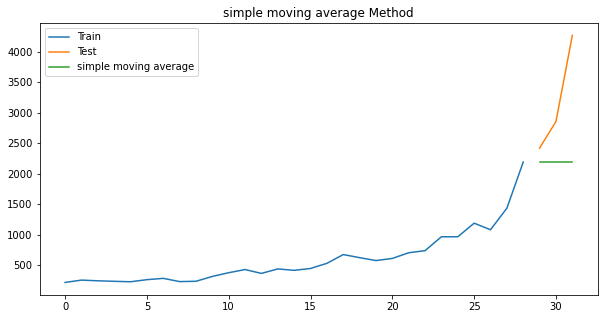

,Method,Mape,RMSE
0,moving average,27.25,1268.86


In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model=SimpleExpSmoothing(train['Price'])
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_exp=test.copy()
y_exp['forecast']=model_fit.forecast(4)

plt.figure(figsize=(10,5))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_exp['forecast'],label='simple moving average')
plt.legend(loc='best')
plt.title('simple moving average Method')
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_exp['forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_exp['forecast'])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

{'smoothing_level': 0.9999999850988388, 'smoothing_trend': 0.4214418654599371, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 203.1132892860118, 'initial_trend': 13.895974198630283, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


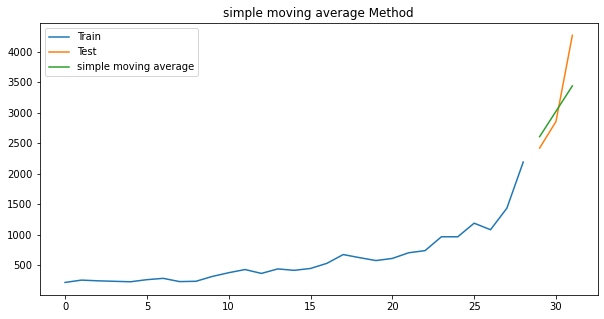

,Method,Mape,RMSE
0,moving average,11.01,500.32


In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(train['Price'],seasonal_periods=12,trend='additive',seasonal=None)
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_full_exp=test.copy()
y_full_exp['forecast']=model_fit.forecast(4)

plt.figure(figsize=(10,5))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(y_full_exp['forecast'],label='simple moving average')
plt.legend(loc='best')
plt.title('simple moving average Method')
plt.show()

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_full_exp['forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_full_exp['forecast'])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(train['Price'],seasonal_periods=3,trend='additive',seasonal='additive')
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_full_exp=test.copy()
y_full_exp['forecast']=model_fit.forecast(4)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_full_exp['forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_full_exp['forecast'])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

{'smoothing_level': 0.9950625601289577, 'smoothing_trend': 0.42111954626044573, 'smoothing_seasonal': 9.751324623840603e-05, 'damping_trend': nan, 'initial_level': 559.4825910109845, 'initial_trend': 1.1394591693108533, 'initial_seasons': array([-340.05221552, -301.79375948, -319.39231373]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,Mape,RMSE
0,moving average,10.11,512.23


In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(train['Price'],seasonal_periods=3,trend='additive',seasonal='multiplicative')
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_full_exp=test.copy()
y_full_exp['forecast']=model_fit.forecast(4)

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Price'],y_full_exp['forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Price']-y_full_exp['forecast'])/test['Price'])*100,2)
results=pd.DataFrame({'Method':['moving average'],'Mape':[mape],'RMSE':[rmse]})
results=results[['Method','Mape','RMSE']]
results

{'smoothing_level': 0.9944917944567522, 'smoothing_trend': 0.3634382565308455, 'smoothing_seasonal': 6.119035235809842e-05, 'damping_trend': nan, 'initial_level': 639.4445017259073, 'initial_trend': 0.010690088183268998, 'initial_seasons': array([0.33639725, 0.3856573 , 0.34915365]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,Mape,RMSE
0,moving average,14.91,675.23
